In [2]:
# Fixing Outliers using IQR method 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import iqr
%matplotlib inline
plt.style.use('ggplot')

In [4]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('WorkingDataFrame2', index_col=0)

In [5]:
target = df.iloc[:,:7]
target2 = df.iloc[:,19:21]
targets = pd.concat([target, target2], axis=1, join_axes=[df.index])
df = df.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1DAY','Y1','Y2'], axis=1)
df.head(15)

,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,122.0,1.0,0.029074,51.345,1,3.864345,11.111111,0.640426,0.959734,0.057285,0.005147,0.009714,0.011540
1,259.0,0.0,-0.013352,25.936,0,12.028832,0.000000,0.644753,1.625986,0.092985,0.005895,0.020091,0.019676
2,90.0,1.0,0.020715,7.378,0,3.369134,0.000000,0.636816,0.397260,0.026982,0.005064,0.002740,0.004981
3,209.0,1.0,0.020023,8.526,0,3.299697,0.000000,0.539634,0.628809,0.042258,0.006642,0.004898,0.009132
4,80.0,1.0,-0.034895,632.298,1,3.726269,5.000000,0.587413,1.093898,0.059776,0.005562,0.012370,0.013865
5,94.0,1.0,-0.057556,197.591,1,5.724394,0.000000,0.643137,1.156829,0.067663,0.005147,0.007970,0.015027
6,128.0,1.0,0.004106,5.146,0,3.463095,0.000000,0.765657,1.158406,0.057949,0.006808,0.008800,0.011208
7,91.0,0.0,0.040620,103.833,0,2.421469,0.000000,0.826347,0.834869,0.051806,0.004566,0.009963,0.010129
8,100.0,1.0,-0.029316,279.600,0,4.816591,0.000000,0.540323,1.117725,0.076131,0.004815,0.010295,0.019427
9,106.0,1.0,-0.024925,494.008,1,3.056608,0.000000,0.514286,0.673059,0.038107,0.006725,0.007472,0.012204


In [6]:
# Checking mean of columns BEFORE fixing outliers 
df.mean()

C1     148.350440
C2       0.863636
C4       0.007342
C7     458.587321
C3'      0.529326
C5'      4.625317
C6'      5.282669
T4'      0.628061
T3'      0.946031
T5'      0.056460
S1'      0.005687
S2'      0.009969
S3'      0.012017
dtype: float64

In [7]:
# Defining functin to replace outliers using IQR of each column
def outlier_replace(x): 
    if x > (Q3 + (1.5*IQR)): 
        x = Q3
    elif x < (Q1 - (1.5*IQR)): 
        x = Q1
    else: 
        pass
    return(x)

Text(0.5, 1.0, 'Fixed Outliers - C1')

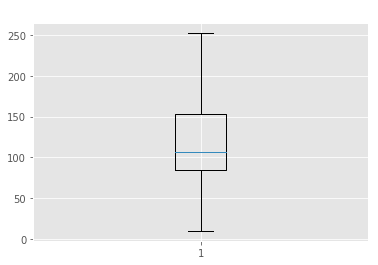

In [8]:
Q1 = df['C1'].quantile(0.25)
Q3 = df['C1'].quantile(0.75)
IQR = iqr(df['C1'])
df['C1'] = df['C1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['C1'])
plt.title("Fixed Outliers - C1", color='white')

Text(0.5, 1.0, 'Fixed Outliers - C7')

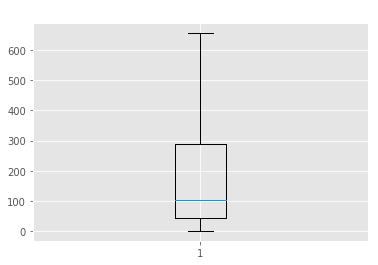

In [9]:
Q1 = df['C7'].quantile(0.25)
Q3 = df['C7'].quantile(0.75)
IQR = iqr(df['C7'])
df['C7'] = df['C7'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['C7'])
plt.title("Fixed Outliers - C7", color='white')

Text(0.5, 1.0, "Fixed Outliers - T3'")

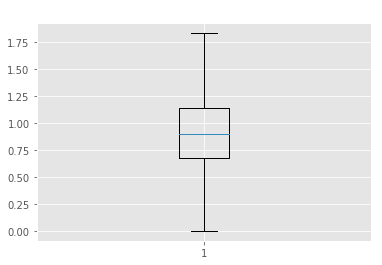

In [11]:
Q1 = df["T3'"].quantile(0.25)
Q3 = df["T3'"].quantile(0.75)
IQR = iqr(df["T3'"])
df["T3'"] = df["T3'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["T3'"])
plt.title("Fixed Outliers - T3'", color='white')

Text(0.5, 1.0, "Fixed Outliers - T4'")

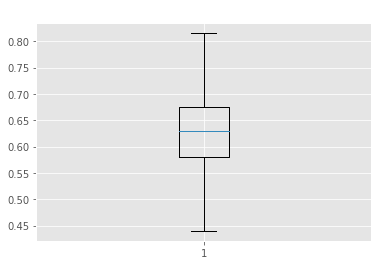

In [12]:
Q1 = df["T4'"].quantile(0.25)
Q3 = df["T4'"].quantile(0.75)
IQR = iqr(df["T4'"])
df["T4'"] = df["T4'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["T4'"])
plt.title("Fixed Outliers - T4'", color='white')

Text(0.5, 1.0, "Fixed Outliers - T5'")

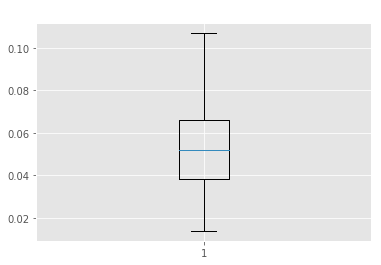

In [13]:
Q1 = df["T5'"].quantile(0.25)
Q3 = df["T5'"].quantile(0.75)
IQR = iqr(df["T5'"])
df["T5'"] = df["T5'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["T5'"])
plt.title("Fixed Outliers - T5'", color='white')

Text(0.5, 1.0, "Fixed Outliers - S1'")

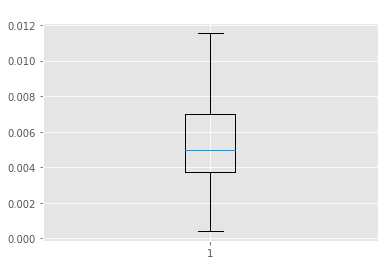

In [14]:
Q1 = df["S1'"].quantile(0.25)
Q3 = df["S1'"].quantile(0.75)
IQR = iqr(df["S1'"])
df["S1'"] = df["S1'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["S1'"])
plt.title("Fixed Outliers - S1'", color='white')

Text(0.5, 1.0, "Fixed Outliers - S2'")

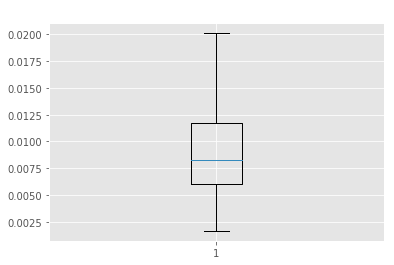

In [15]:
Q1 = df["S2'"].quantile(0.25)
Q3 = df["S2'"].quantile(0.75)
IQR = iqr(df["S2'"])
df["S2'"] = df["S2'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["S2'"])
plt.title("Fixed Outliers - S2'", color='white')

Text(0.5, 1.0, "Fixed Outliers - S3'")

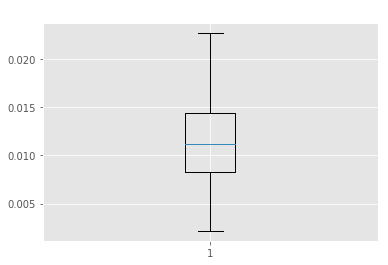

In [16]:
Q1 = df["S3'"].quantile(0.25)
Q3 = df["S3'"].quantile(0.75)
IQR = iqr(df["S3'"])
df["S3'"] = df["S3'"].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["S3'"])
plt.title("Fixed Outliers - S3'", color='white')

Text(0.5, 1.0, "Fixed Outliers - C5'")

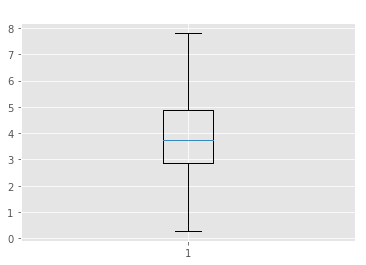

In [17]:
Q1 = df["C5'"].quantile(0.25)
Q3 = df["C5'"].quantile(0.75)
IQR = iqr(df["C5'"])
df["C5'"] = df["C5'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C5'"])
plt.title("Fixed Outliers - C5'", color='white')

Text(0.5, 1.0, "Fixed Outliers - C6'")

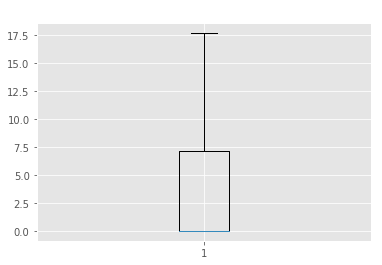

In [18]:
Q1 = df["C6'"].quantile(0.25)
Q3 = df["C6'"].quantile(0.75)
IQR = iqr(df["C6'"])
df["C6'"] = df["C6'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C6'"])
plt.title("Fixed Outliers - C6'", color='white')

In [19]:
df.mean()

C1     115.363270
C2       0.863636
C4       0.007342
C7     154.910100
C3'      0.529326
C5'      3.853964
C6'      3.328752
T4'      0.628948
T3'      0.915715
T5'      0.053090
S1'      0.005343
S2'      0.008875
S3'      0.011416
dtype: float64

In [20]:
# Exporting DataFrame as CSV 
df.to_csv('OutlierFix2', ',')

In [21]:
targets.to_csv('Targets2', ',')